# Red Wine Quality Prediction 
## Using (K-Nearest Neighbours | Random Forest | XGBoost ) Algorithms

## Importing Libraries and Reading dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data=pd.read_csv('datasets_4458_8204_winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Visualizing Columns of Dataset to check which columns are not contributing much to quality of wine

(array([0.02490495, 0.1267385 , 0.29996624, 0.20532744, 0.10404733,
        0.06087876, 0.04206169, 0.01438952, 0.00276722, 0.0038741 ]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

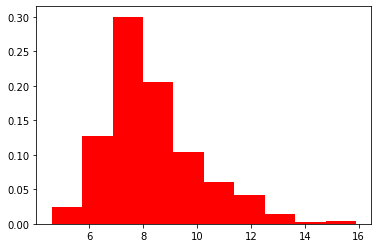

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['fixed acidity'],density=True,bins=10,color='red')

(array([0.31269543, 1.73481714, 1.81192012, 2.03466207, 0.63395787,
        0.21845845, 0.07710298, 0.0128505 , 0.008567  , 0.0042835 ]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

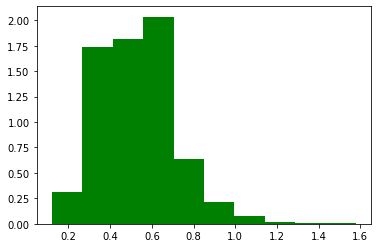

In [3]:
plt.hist(data['volatile acidity'],density=True,bins=10,color='green')

(array([2.5203252 , 1.26954346, 1.97623515, 1.28205128, 1.63852408,
        0.82551595, 0.38774234, 0.09380863, 0.        , 0.00625391]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

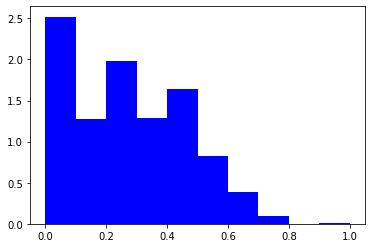

In [4]:
plt.hist(data['citric acid'],density=True,bins=10,color='blue')

(array([0.42577981, 0.19832601, 0.02869944, 0.01927575, 0.00471185,
        0.0034268 , 0.00128505, 0.        , 0.00214175, 0.00128505]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <BarContainer object of 10 artists>)

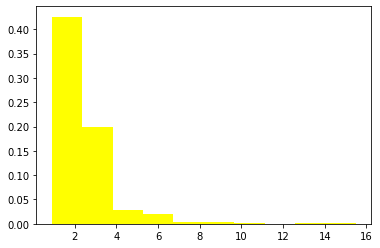

In [5]:
plt.hist(data['residual sugar'],density=True,bins=10,color='yellow')

(array([ 4.77134603, 11.10877938,  0.36542037,  0.18793048,  0.03132175,
         0.08352466,  0.10440582,  0.02088116,  0.        ,  0.02088116]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <BarContainer object of 10 artists>)

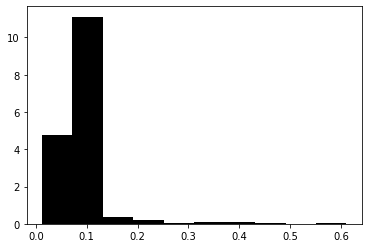

In [6]:
plt.hist(data['chlorides'],density=True,bins=10,color='black')

## Dropping Quality column ( As it is to be predicted) and Sulphate column (As it is does not contribute much to our quality prediction)

In [7]:
new_data=data.dropna(axis=1,how='any')
data = data[data['residual sugar'] < 8.0]
y = data["quality"].values
X = data.drop(["quality","sulphates"],axis=1)

In [8]:
# X = X[X['volatile acidity'] < 1.0]

In [9]:
X.shape

(1578, 10)

## Train Test Split - 90% Train, 10% Test 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.90,random_state=42,stratify=y)

## Applying K-Nearest Neighbours Classifier Algorithm

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=1,algorithm='auto',p=1)
knn.fit(X_train,y_train)
y_prediction = knn.predict(X_test)

# Results of K-Nearest Neighbours Classifier Algorithm

In [12]:
knn.score(X_test,y_test)

0.5822784810126582

## Printing Classification Report

In [13]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.61      0.74      0.67        68
           6       0.57      0.51      0.54        63
           7       0.75      0.47      0.58        19
           8       0.50      0.50      0.50         2

    accuracy                           0.58       158
   macro avg       0.41      0.37      0.38       158
weighted avg       0.59      0.58      0.58       158



c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<AxesSubplot:>

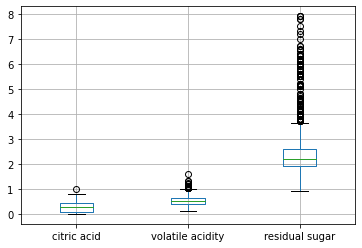

In [14]:
data.boxplot(column=['citric acid','volatile acidity','residual sugar'])

,'pH','sulphates','alcohol','quality'

<AxesSubplot:>

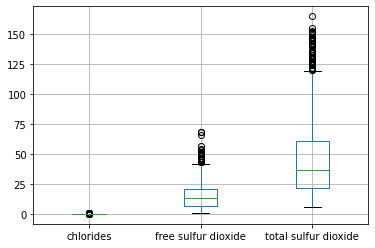

In [15]:
data.boxplot(column=['chlorides','free sulfur dioxide','total sulfur dioxide'])

<AxesSubplot:>

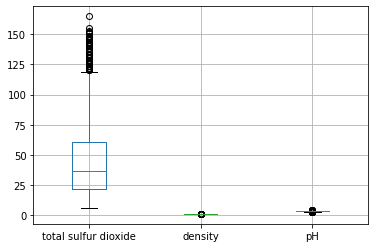

In [16]:
data.boxplot(column=['total sulfur dioxide','density','pH'])

<AxesSubplot:>

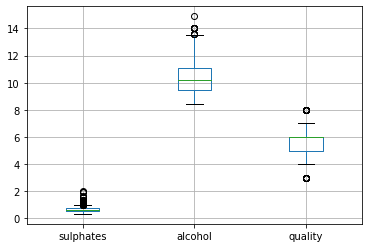

In [17]:
data.boxplot(column=['sulphates','alcohol','quality'])

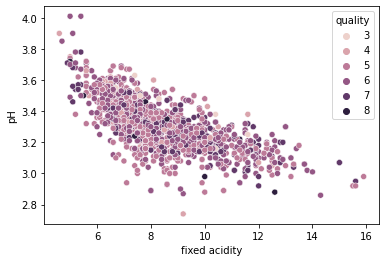

In [18]:
fixed_acid = sns.scatterplot(x='fixed acidity',y='pH',hue='quality',data=data)

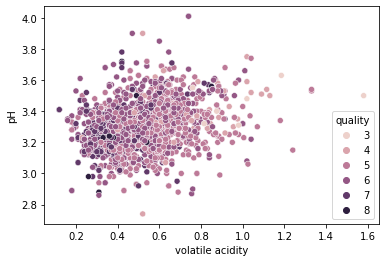

In [19]:
vol_acid = sns.scatterplot(x=data['volatile acidity'],y=data['pH'],hue=data['quality'])

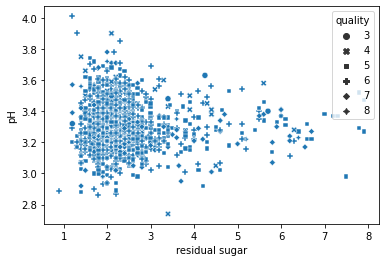

In [20]:
resi = sns.scatterplot(x=data['residual sugar'],y=data['pH'],style=data['quality'])

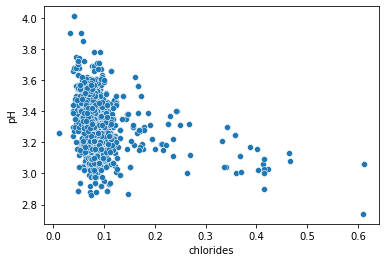

In [21]:
chlor = sns.scatterplot(x=data['chlorides'],y=data['pH'])

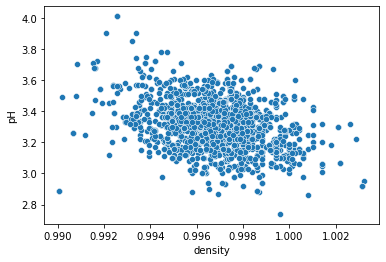

In [22]:
density = sns.scatterplot(x=data['density'],y=data['pH'])

# Applying Random Forest Classifier Algorithm

## Train Test Split - 90% Train, 10% Test

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.90,random_state=42,stratify=y)

In [24]:
from sklearn.ensemble import RandomForestClassifier
 
# for error checking
from sklearn.metrics import mean_squared_error
 
# create model variable
rnd = RandomForestClassifier()
 
# fit the model
fit_rnd = rnd.fit(X_train,y_train)
# checking the accuracy score
rnd_score = rnd.score(X_test,y_test)
 
print('score of model is : ',rnd_score)
 


score of model is :  0.7151898734177216


## Printing Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
### (According to Random Forest Classifier)

In [25]:
y_predict_r = rnd.predict(X_test)

# y_predict = list(rnd.predict(y_test))
# checking mean_squared error
MSE = mean_squared_error(y_test,y_predict_r)
 
# checking root mean squared error
RMSE = np.sqrt(MSE)
 
print('mean squared error is : ',MSE)
 
print('root mean squared error is : ',RMSE)

mean squared error is :  0.36075949367088606
root mean squared error is :  0.6006325779300404


## Printing Classification Report

In [26]:
print(classification_report(y_test,y_predict_r))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.78      0.82      0.80        68
           6       0.67      0.76      0.71        63
           7       0.62      0.42      0.50        19
           8       1.00      0.50      0.67         2

    accuracy                           0.72       158
   macro avg       0.51      0.42      0.45       158
weighted avg       0.69      0.72      0.70       158



c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Applying XGBoost Algorithm for Prediction

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [28]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(random_state=1)
xgboost.fit(X_train, y_train)
y_pred_x = xgboost.predict(X_test)
print(classification_report(y_test, y_pred_x))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      1.00      0.03         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2

    accuracy                           0.01       158
   macro avg       0.00      0.12      0.00       158
weighted avg       0.00      0.01      0.00       158



c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sahil mutha\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

## Below, I have plotted Feature importance graph for Random Forest Classifier

<AxesSubplot:>

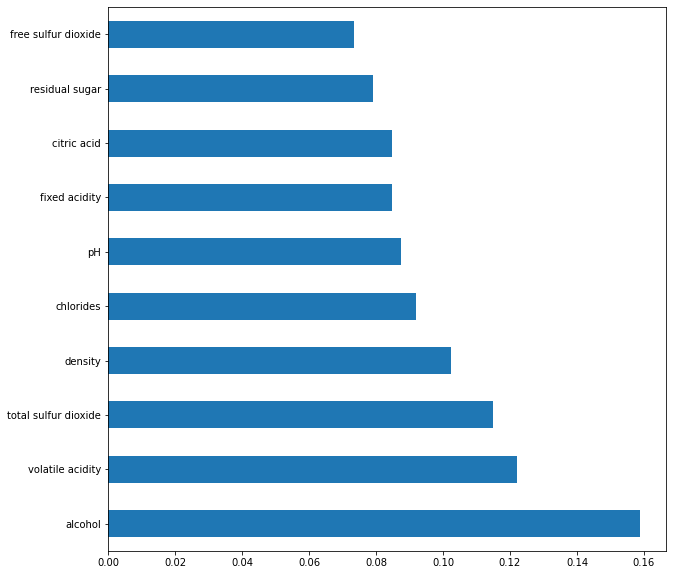

In [29]:
feat_importances = pd.Series(rnd.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

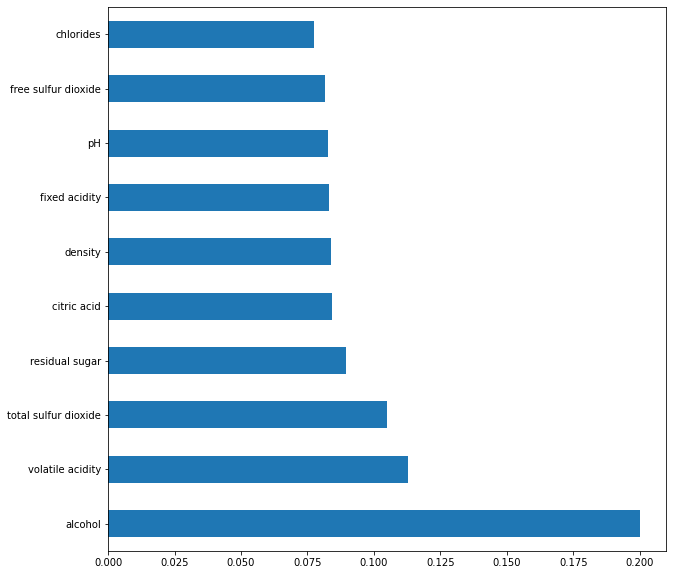

In [30]:
feat_importances = pd.Series(xgboost.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

### By looking into the details of above graph, we can see that good quality of red wines have higher levels of alcohol and volatile acidity and lower levels of chlorides and residual sugar on average.

# 

## We got approximately 70% accurate results using Random Forest Classifier algorithm and approximately 58% prediction accuracy using K-Neighbours Classifier (KNN) algorithm.

## Thereby, we can conclude that Random Forest Algorithm has made better predictions over KNN Classsifer algorithm in predicting quality of red wine